In [3]:
# Ramon Ulloa
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

In [7]:
#Instantiating RandomForestClassifier object
ccfd_randomforest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 7)

#Training the model
ccfd_randomforest.fit(X_train_balanced,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
randomforest_prediction = ccfd_randomforest.predict(X_test_balanced)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_rf = metrics.accuracy_score(y_test_balanced, randomforest_prediction)

#Displaying final accuracy score
"Accuracy Score: ", score_rf

('Accuracy Score: ', 0.9768293270388747)

# ROC / AUC

Area Under Curve: 
0.9888227217915413


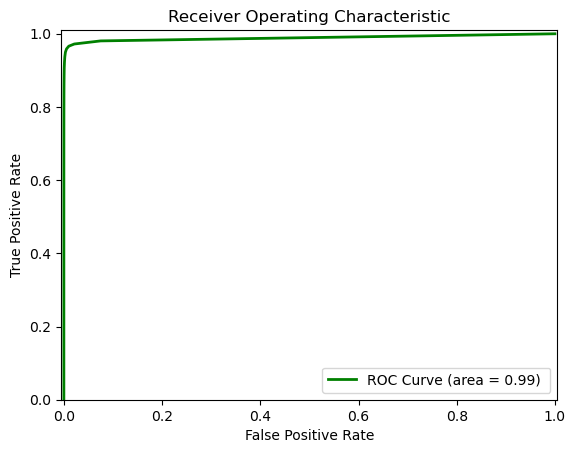

In [10]:
#Estimating the probability of Credit Card Fraud Label
randomforest_prediction_probability = ccfd_randomforest.predict_proba(X_test_balanced)

#Calculating true positive rate(tpr) and false positive rate(fpr)
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test_balanced, randomforest_prediction_probability[:,1], pos_label=1)

#Calculating Area Under Curve
rf_AUC = metrics.auc(rf_fpr, rf_tpr)
print("Area Under Curve: ", rf_AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='green', lw=2, label='ROC Curve (area = %0.2f) ' % rf_AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');

# Random Forest Feature Importance Analysis

                  feature  importance
2                     amt    0.431871
25   category_grocery_pos    0.089056
32  category_shopping_net    0.077170
19                   hour    0.062851
29      category_misc_net    0.040408


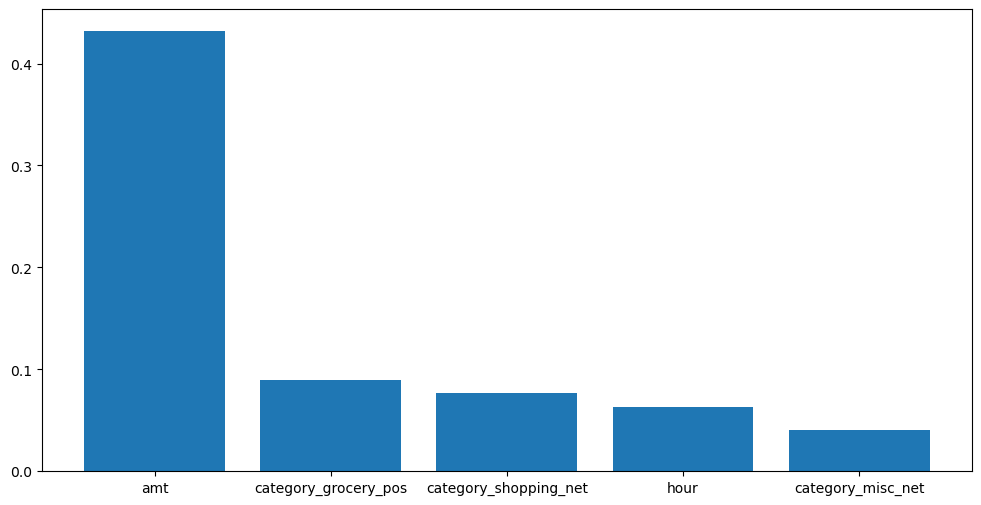

In [13]:
#Creating a new DataFrame object to hold the name of the feature as well as its corresponding feature importance value 
df_feature_importance = pd.DataFrame({'feature': X_train_balanced.columns, 'importance': ccfd_randomforest.feature_importances_})

#Sorting the dataframe in descending order by feature importance value and printing out the head of the dataframe
feature_importance_sorted = df_feature_importance.sort_values(by='importance', ascending=False).head()
print(feature_importance_sorted.head())

#Plotting bar graph of the dataframet to visually display most important features
plt.figure(figsize=(12,6))
plt.bar(feature_importance_sorted['feature'], feature_importance_sorted['importance'])
plt.show() 

# PCA (Principal Component Analysis) - an unsupervised dimensionality reduction

In [20]:
pca = PCA(n_components = 10)
X_Train_pca = pca.fit_transform(X_train_balanced)
X_Test_pca = pca.transform(X_test_balanced)

In [25]:
#Instantiating RandomForestClassifier object
ccfd_randomforest_pca = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 7)

#Training the model w new pca training set
ccfd_randomforest_pca.fit(X_Train_pca,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud using new pca testing set
randomforest_prediction_pca = ccfd_randomforest_pca.predict(X_Test_pca)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_rf_pca = metrics.accuracy_score(y_test_balanced, randomforest_prediction_pca)

#Displaying final accuracy score
"Accuracy Score for pca variant: ", score_rf_pca

('Accuracy Score for pca variant: ', 0.9316606652536249)

# PCA ROC / AUC

Area Under Curve for pca variant: 
0.913017302660426


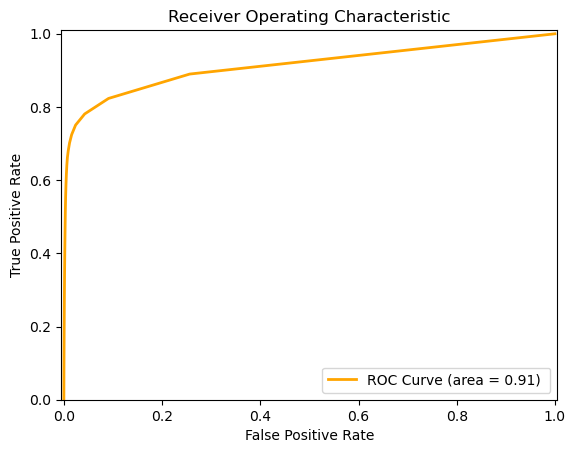

In [28]:
#Estimating the probability of Credit Card Fraud Label
randomforest_prediction_probability_pca = ccfd_randomforest_pca.predict_proba(X_Test_pca)

#Calculating true positive rate(tpr) and false positive rate(fpr)
rf_pca_fpr, rf_pca_tpr, rf_pca_thresholds = metrics.roc_curve(y_test_balanced, randomforest_prediction_probability_pca[:,1], pos_label=1)

#Calculating Area Under Curve
rf_pca_AUC = metrics.auc(rf_pca_fpr, rf_pca_tpr)
print("Area Under Curve for pca variant: ", rf_pca_AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(rf_pca_fpr, rf_pca_tpr, color='orange', lw=2, label='ROC Curve (area = %0.2f) ' % rf_pca_AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');